# Problem 8-8, 8-10

Problem 8-8  
Consider the reaction
$$ A \rightarrow D \rightarrow U $$
Pure A is fed to a 1.0 dm$^3$ CSTR where it reacts to form a desired product (D), which can then react further to produce an undesrired product (U); both reactions are elementary and irreversible, and everything is liquid phase. The concentration of A is 1 mol/dm$^3$ at a molar flowrate of 1 mol/min.
1. Sketch the conversion of A, X, the instantaneous Selectivity of D to U, $S_{D/U}$, and the instantaneous yield of D, $Y_D$, as a function of space time (make sure you label the plot). You may want to write a senetence of two of reasoning for partial credit purposes.
2. If at $\tau$ = 1.0 minutes the instantaneous selectivity, S$_{D/U}$, is (1/2) and the conversion of A is (0.5), what are the specific reaction rates $k_1$ and $k_2$.

| In         | Out       | Generation | SUM |
|------------|-----------|------------|-----|
| $F_{A0}$  | $F_A$      | $r_A V$    |   0 |
|$v_0 C_{A0}$| $v_0 C_A$ | $r_A V  $  |   0 |

$$ C_{A0} - C_A + r_A \tau = 0 $$

$$ C_A = \frac{C_{A0}}{1 + \tau k_1} $$

$$ -C_B + r_B \tau = 0 $$

$$ C_D = \frac{\tau k_1 C_{A0}}{(1 + k_1 \tau)(1 + k_2 \tau)}$$

$$ C_U = \frac{\tau^2 k_1 k_2 C_{A0}}{(1+k_1 \tau)(1 + k_2 \tau)} $$

$$-r_A = k_1 C_A^\alpha$$

$$ -r_A   =  0.5 \frac{mol}{dm^3} \cdot \frac{1.0}{min}$$

$$1 + 1 min \cdot k_1 = 2,  k_1 = 1 min^{-1}$$

conversion will be: $$ -\frac{1}{1 + \tau k_1}$$ for $C_A$ and D it will be $$\frac{C_{D0}- \frac{\tau k_1 C_{A0}}{(1 + k_1 \tau)(1 + k_2 \tau)}}{C_{D0}} $$

$$S_{D/U} = \frac{C_D}{C_U} = \frac{1}{\tau k_2} $$

$$ Y_D = \frac{C_D}{C_{A0}-C_A}= \frac{1}{(1 + k_1 \tau)^2(1+k_2 \tau)}$$

Problem 8-10  
Terapthalic acid (TPA) fins extensive use in the manufacture of synthetic fibers (e.g., Dacron) and as an intermediate for polyester films (e.g. Mylar). The formation of potassium terephthalate from potassium benzoate was studied using a tibular reactor.
    It was found that the intermediates (primarily K-phthalates) formed from the dissociation of K-benzoate over a CdCl$_2$ catalyst reacted with K-terephthalate in n autocatalytic reaction step
$$ A \rightarrow R \rightarrow S  \text{         Series} $$
$$ R + S \rightarrow \text{2S}    \text{    Autocatalytic} $$
where A = k-benzoate, R = lumped intermediates (k-phthalates, k-isophthalates, and K-bezenecarboxylates), and S = K-terephthalate. Pure A is charged to the reactor at a pressure of 110 kPa. The specific reaction rates at 410 ˚C are $k_1$ = 1.08e-3 s$^{-1}$ with $E_1$ = 42.6 kcal/mol, $k_2$ = 1.19e-3 s$^{-1}$ with $E_2$ = 48.6 kcal/mol, and $k_3$ = 1.59e-3 dm$^3$/mol \cdot s with $E_3$ = 32 kcal/mol.
1. Plot and analyze the concentrations of A, R, and S as a function of time in a batch reacotr at 410 ˚C, noting when the maximum in R occurs.
2. Repeat (a) for temperatures of 430 ˚C and 390˚C.
3. What would be the exit concentrations from a CSTR operated at 410 ˚C and a space time of 1200 s?

In [41]:
import matplotlib.pyplot as plt
import numpy as np
pressure = 110e3
temp = 410 # C
K = np.array([1.08e-3, 1.19e-3, 1.59e-3])
E = np.array([42.6, 48.6, 32])

$$ \frac{dC_A}{dt} = -k_1 C_A$$
$$ \frac{dC_r}{dt} = k_1 C_A - k_2 C_R - k_3 C_R C_S$$
$$ \frac{dC_S}{dt} = k_2 C_R - k_3 C_R C_S $$

$$C_{A0} = \frac{P}{R T}$$

In [42]:
C_A0 = pressure / (8.314 * (temp + 273.15))
print(C_A0, "mol/m^3")

19.36718906959513 mol/m^3


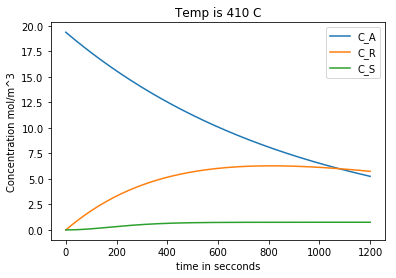

In [44]:
t = np.linspace(0,1200,1200)
C_R0 = 0
C_S0 = 0

k = K * np.exp(E / 8.314 / (temp + 273.15))
C_A = np.array([C_A0])
C_R = np.array([C_R0])
C_S = np.array([C_S0])

da_dt = lambda k, a: -k[0] * a
dr_dt = lambda k, a, r, s: k[0] * a - k[1] * r - k[2] * s
ds_dt = lambda k, r, s: k[1] * r - k[2] * r * s
for i in t:
    a = C_A[-1]
    r = C_R[-1]
    s = C_S[-1]
    dt = (t[0] + t[-1])/len(t)
    if i != 0:
        C_A = np.append(C_A,( a + da_dt(k, a) * dt))
        C_R = np.append(C_R, (r + dr_dt(k, a, r, s) * dt))
        C_S = np.append(C_S, (s + ds_dt(k, r, s) * dt))

plt.plot(t, C_A, t, C_R, t, C_S)
plt.xlabel("time in secconds")
plt.ylabel("Concentration mol/m^3")
plt.title("Temp is 410 C")
plt.gca().legend(('C_A','C_R','C_S'))
plt.show()

C_A0 = 18.816319722525655 mol/m^3


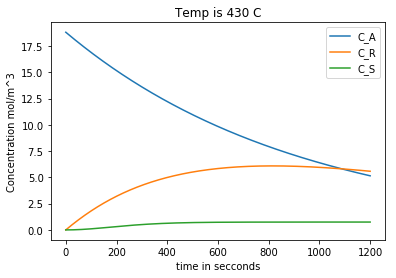

In [38]:
pressure = 110e3
temp = 430 # C
k = np.array([1.08e-3, 1.19e-3, 1.59e-3])
E = [42.6, 48.6, 32]
C_A0 = pressure / (8.314 * (temp + 273.15))
print("C_A0 =",C_A0, "mol/m^3")


t = np.linspace(0,1200,1200)
C_R0 = 0
C_S0 = 0

C_A = np.array([C_A0])
C_R = np.array([C_R0])
C_S = np.array([C_S0])

da_dt = lambda k, a: -k[0] * a
dr_dt = lambda k, a, r, s: k[0] * a - k[1] * r - k[2] * s
ds_dt = lambda k, r, s: k[1] * r - k[2] * r * s
for i in t:
    a = C_A[-1]
    r = C_R[-1]
    s = C_S[-1]
    dt = (t[0] + t[-1])/len(t)
    if i != 0:
        C_A = np.append(C_A,( a + da_dt(k, a) * dt))
        C_R = np.append(C_R, (r + dr_dt(k, a, r, s) * dt))
        C_S = np.append(C_S, (s + ds_dt(k, r, s) * dt))

plt.plot(t, C_A, t, C_R, t, C_S)
plt.title("Temp is 430 C")
plt.xlabel("time in secconds")
plt.ylabel("Concentration mol/m^3")
plt.gca().legend(('C_A','C_R','C_S'))
plt.show()

C_A0 = 19.951285852211285 mol/m^3


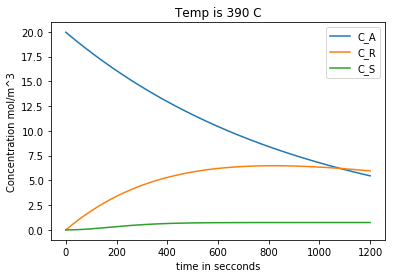

In [40]:
pressure = 110e3
temp = 390 # C
k = np.array([1.08e-3, 1.19e-3, 1.59e-3])
E = [42.6, 48.6, 32]
C_A0 = pressure / (8.314 * (temp + 273.15))
print("C_A0 =",C_A0, "mol/m^3")


t = np.linspace(0,1200,12000)
C_R0 = 0
C_S0 = 0

C_A = np.array([C_A0])
C_R = np.array([C_R0])
C_S = np.array([C_S0])

da_dt = lambda k, a: -k[0] * a
dr_dt = lambda k, a, r, s: k[0] * a - k[1] * r - k[2] * s
ds_dt = lambda k, r, s: k[1] * r - k[2] * r * s
for i in t:
    a = C_A[-1]
    r = C_R[-1]
    s = C_S[-1]
    dt = (t[0] + t[-1])/len(t)
    if i != 0:
        C_A = np.append(C_A,( a + da_dt(k, a) * dt))
        C_R = np.append(C_R, (r + dr_dt(k, a, r, s) * dt))
        C_S = np.append(C_S, (s + ds_dt(k, r, s) * dt))

plt.plot(t, C_A, t, C_R, t, C_S)
plt.title("Temp is 390 C")
plt.xlabel("time in secconds")
plt.ylabel("Concentration mol/m^3")
plt.gca().legend(('C_A','C_R','C_S'))
plt.show()

